<a href="https://colab.research.google.com/github/lim-jr/ESAA-Submits/blob/main/00_%EC%B5%9C%EC%A2%85_OB1%EC%A1%B0_%EB%AC%BC%EB%A5%98%EC%9C%A0%ED%86%B5%EB%9F%89%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물류 유통량 예측 경진대회

https://dacon.io/competitions/official/235867/overview/description

* 목적
: 제주시 내 택배 운송 데이터를 이용하여 운송량 예측 AI 개발

* 데이터 정보
  - train_df.csv

    - index : 인덱스
    - 송하인_격자공간고유번호
    - 수하인 격자공간고유번호
    - 물품_카테고리
    - 운송장_건수
  - test_df.csv
    - index : 인덱스
    - 송하인_격자공간고유번호
    - 수하인 격자공간고유번호
    - 물품_카테고리
  - sample_submission.csv
    - index : 인덱스
    - 운송장_건수





# 01 라이브러리 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

In [ ]:
import os
os.chdir("/content/drive/MyDrive/ESAA/OB1조/프로젝트(1)/Data") # working directory를 설정함

In [ ]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.info()

- null 데이터 없이 잘 들어가 있음을 알 수 있다. 

In [ ]:
train.isnull().sum()

In [ ]:
test.info()

- null 데이터 없이 잘 들어가 있음을 알 수 있다. 

# 02 데이터 해석


## 1) 격자공간고유번호 의미

*   의미단위별로 분리   
 *   시: 1-2번째 숫자
 *   군/구: 3-5번째 숫자
 *   동: 6-10번째 숫자

In [ ]:
seoul = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_11.csv') # index_col=0
seoul.head()

In [ ]:
seoul[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
busan = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_26.csv') # index_col=0
busan.head()

In [ ]:
busan[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
daegu = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_27.csv') # index_col=0
daegu.head()

In [ ]:
daegu[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
incheon = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_28.csv') # index_col=0
incheon.head()

In [ ]:
incheon[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
gwangju = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_29.csv') # index_col=0
gwangju.head()

In [ ]:
gwangju[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
daejeon = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_30.csv') # index_col=0
daejeon.tail()

In [ ]:
daejeon[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
ulsan = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_31.csv') # index_col=0
ulsan.head()

In [ ]:
ulsan[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
sejong = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_36.csv') # index_col=0
sejong.head()

In [ ]:
sejong[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
gyeonggi = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_41.csv') # index_col=0
gyeonggi.head()

In [ ]:
gyeonggi[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
gangwon = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_42.csv') # index_col=0
gangwon.head()

In [ ]:
gangwon[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
north_chungcheong = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_43.csv') # index_col=0
north_chungcheong.head()

In [ ]:
north_chungcheong[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
south_chungcheong = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_44.csv') # index_col=0
south_chungcheong.head()

In [ ]:
south_chungcheong[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
north_jeonla = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_45.csv') # index_col=0
north_jeonla.head()

In [ ]:
north_jeonla[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
south_th_jeonla = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_46.csv') # index_col=0
south_th_jeonla.head()

In [ ]:
south_th_jeonla[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
north_gyeongsang = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_47.csv') # index_col=0
north_gyeongsang.head()

In [ ]:
north_gyeongsang[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
south_gyeongsang = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_48.csv') # index_col=0
south_gyeongsang.head()

In [ ]:
south_gyeongsang[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

In [ ]:
jeju = pd.read_csv('TC_NU_SPG_50_METER/TC_NU_SPG_50_METER_50.csv') # index_col=0
jeju.head()

In [ ]:
jeju[['시군구명','시군구코드']].groupby(['시군구명','시군구코드']).count()

# 03 EDA 및 피처 엔지니어링

## 1) 격자공간고유번호

### (1) 의미단위별로 분리
* 격자공간고유번호 의미

  - 시: 첫 2자, 군/구: 3-5번째, 동: 6-10번째
  - 군/구가 달라도 같은 동이름은 있을 수 있음 -> 그래도 시,군구가 다르므로 문제가 되지 않을 것

- 격자고유번호가 숫자로 되어 있어 슬라이싱 되지 않으므로 문자로 타입을 먼저 바꾼다

In [ ]:
train['송하인_격자공간고유번호'] = train['송하인_격자공간고유번호'].astype(str)
train['수하인_격자공간고유번호'] = train['수하인_격자공간고유번호'].astype(str)

In [ ]:
train['송하인_시코드'] = train['송하인_격자공간고유번호'].map(lambda x:x[:2])
train['수하인_시코드'] = train['수하인_격자공간고유번호'].map(lambda x:x[:2])

In [ ]:
train['송하인_군구코드'] = train['송하인_격자공간고유번호'].map(lambda x:x[2:5])
train['수하인_군구코드'] = train['수하인_격자공간고유번호'].map(lambda x:x[2:5])

In [ ]:
train['송하인_동코드'] = train['송하인_격자공간고유번호'].map(lambda x:x[5:10])
train['수하인_동코드'] = train['수하인_격자공간고유번호'].map(lambda x:x[5:10])

In [ ]:
train.head()

In [ ]:
test['송하인_격자공간고유번호'] = test['송하인_격자공간고유번호'].astype(str)
test['수하인_격자공간고유번호'] = test['수하인_격자공간고유번호'].astype(str)

In [ ]:
test['송하인_시코드'] = test['송하인_격자공간고유번호'].map(lambda x:x[:2])
test['수하인_시코드'] = test['수하인_격자공간고유번호'].map(lambda x:x[:2])

In [ ]:
test['송하인_군구코드'] = test['송하인_격자공간고유번호'].map(lambda x:x[2:5])
test['수하인_군구코드'] = test['수하인_격자공간고유번호'].map(lambda x:x[2:5])

In [ ]:
test['송하인_동코드'] = test['송하인_격자공간고유번호'].map(lambda x:x[5:10])
test['수하인_동코드'] = test['수하인_격자공간고유번호'].map(lambda x:x[5:10])

In [ ]:
test.head()

### (2) EDA 및 인코딩
* 시코드 : 운송장_건수의 합으로 인코딩
* 군구, 동코드 : 빈도 값으로 인코딩
* train 기반으로 인코딩열을 만들고 test에 붙이기기

#### 시도 : 운송장 건수로 인코딩

> 수하인 인코딩

In [ ]:
train.groupby('수하인_시코드')['운송장_건수'].sum()

In [ ]:
수하인_시 = ['11', '26','27', '28', '29','30','31','36','41','42','43','44','45','46','47','48','50']

In [ ]:
train['수하인_시운송장총건수']=''

In [ ]:
for k in range(len(train)):
    if train['수하인_시코드'][k] == '11':
      train['수하인_시운송장총건수'][k] = 19852
    if train['수하인_시코드'][k] == '26':
      train['수하인_시운송장총건수'][k] = 6561
    if train['수하인_시코드'][k] == '27':
      train['수하인_시운송장총건수'][k] = 3732
    if train['수하인_시코드'][k] == '28':
      train['수하인_시운송장총건수'][k] = 5623
    if train['수하인_시코드'][k] == '29':
      train['수하인_시운송장총건수'][k] = 2749
    if train['수하인_시코드'][k] == '30':
      train['수하인_시운송장총건수'][k] = 2990
    if train['수하인_시코드'][k] == '31':
      train['수하인_시운송장총건수'][k] = 2304
    if train['수하인_시코드'][k] == '36':
      train['수하인_시운송장총건수'][k] = 637
    if train['수하인_시코드'][k] == '41':
      train['수하인_시운송장총건수'][k] = 29190
    if train['수하인_시코드'][k] == '42':
      train['수하인_시운송장총건수'][k] = 3674
    if train['수하인_시코드'][k] == '43':
      train['수하인_시운송장총건수'][k] = 3378
    if train['수하인_시코드'][k] == '44':
      train['수하인_시운송장총건수'][k] = 5202
    if train['수하인_시코드'][k] == '45':
      train['수하인_시운송장총건수'][k] = 4254
    if train['수하인_시코드'][k] == '46':
      train['수하인_시운송장총건수'][k] = 4052
    if train['수하인_시코드'][k] == '47':
      train['수하인_시운송장총건수'][k] = 5009
    if train['수하인_시코드'][k] == '48':
      train['수하인_시운송장총건수'][k] = 6285
    if train['수하인_시코드'][k] == '50':
      train['수하인_시운송장총건수'][k] = 49104

In [ ]:
train.head()

> 수하인 운송장 건수 EDA

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
수하인_시운송장총건수 = pd.DataFrame(train.groupby('수하인_시코드')['운송장_건수'].sum())

In [ ]:
x1 = 수하인_시운송장총건수.index
y1 = 수하인_시운송장총건수['운송장_건수']

plt.bar(x1, y1)
plt.title('수하인_시운송장총건수', fontsize=20)
plt.xlabel('수하인_시코드', fontsize=18)
plt.ylabel('운송장 총건수', fontsize=18)

plt.show()

> 송하인 인코딩

In [ ]:
train.groupby('송하인_시코드')['운송장_건수'].sum()

In [ ]:
train['송하인_시운송장총건수']=''

In [ ]:
for k in range(len(train)):
    if train['송하인_시코드'][k] == '11':
      train['송하인_시운송장총건수'][k] = 6252
    if train['송하인_시코드'][k] == '26':
      train['송하인_시운송장총건수'][k] = 1214
    if train['송하인_시코드'][k] == '27':
      train['송하인_시운송장총건수'][k] = 1176
    if train['송하인_시코드'][k] == '28':
      train['송하인_시운송장총건수'][k] = 1250
    if train['송하인_시코드'][k] == '29':
      train['송하인_시운송장총건수'][k] = 324
    if train['송하인_시코드'][k] == '30':
      train['송하인_시운송장총건수'][k] = 1416
    if train['송하인_시코드'][k] == '31':
      train['송하인_시운송장총건수'][k] = 175
    if train['송하인_시코드'][k] == '36':
      train['송하인_시운송장총건수'][k] = 31
    if train['송하인_시코드'][k] == '41':
      train['송하인_시운송장총건수'][k] = 27198
    if train['송하인_시코드'][k] == '42':
      train['송하인_시운송장총건수'][k] = 724
    if train['송하인_시코드'][k] == '43':
      train['송하인_시운송장총건수'][k] = 1832
    if train['송하인_시코드'][k] == '44':
      train['송하인_시운송장총건수'][k] = 1797
    if train['송하인_시코드'][k] == '45':
      train['송하인_시운송장총건수'][k] = 1412
    if train['송하인_시코드'][k] == '46':
      train['송하인_시운송장총건수'][k] = 758
    if train['송하인_시코드'][k] == '47':
      train['송하인_시운송장총건수'][k] = 1502
    if train['송하인_시코드'][k] == '48':
      train['송하인_시운송장총건수'][k] = 953
    if train['송하인_시코드'][k] == '50':
      train['송하인_시운송장총건수'][k] = 106582

In [ ]:
train.head()

> 송하인 운송장 건수 EDA

In [ ]:
송하인_시운송장총건수 = pd.DataFrame(train.groupby('송하인_시코드')['운송장_건수'].sum())

In [ ]:
x2 = 송하인_시운송장총건수.index
y2 = 송하인_시운송장총건수['운송장_건수']

plt.bar(x2, y2)
plt.title('송하인_시운송장총건수', fontsize=20)
plt.xlabel('송하인_시코드', fontsize=18)
plt.ylabel('운송장 총건수', fontsize=18)

plt.show()

#### 군구/동 : 빈도로 인코딩
* train test 합쳐서 빈도 도출
* 빈도 도출한 뒤 split

In [ ]:
num_train = len(train)
all_data = pd.concat([train, test], ignore_index=True)
all_data

군구

In [ ]:
# 송하인
freq_song_gu = all_data['송하인_군구코드'].value_counts().sort_values()
freq_song_gu = freq_song_gu.reset_index()
freq_song_gu.columns = ['군구동', '빈도']

all_data['송하인_군구코드_빈도']=0

for i in range(len(all_data)):
  for j in range(len(freq_song_gu)):
    if all_data['송하인_군구코드'][i] == freq_song_gu['군구동'][j]:
      all_data['송하인_군구코드_빈도'][i] = freq_song_gu['빈도'][j]

In [ ]:
# 수하인
freq_su_gu = all_data['수하인_군구코드'].value_counts().sort_values()
freq_su_gu = freq_su_gu.reset_index()
freq_su_gu.columns = ['군구동', '빈도']

all_data['수하인_군구코드_빈도']=0

for i in range(len(all_data)):
  for j in range(len(freq_su_gu)):
    if all_data['수하인_군구코드'][i] == freq_su_gu['군구동'][j]:
      all_data['수하인_군구코드_빈도'][i] = freq_su_gu['빈도'][j]

동

In [ ]:
# 송하인
freq_song_dong = all_data['송하인_동코드'].value_counts().sort_values()
freq_song_dong = freq_song_dong.reset_index()
freq_song_dong.columns = ['군구동', '빈도']

all_data['송하인_동코드_빈도']=0

for i in range(len(all_data)):
  for j in range(len(freq_song_dong)):
    if all_data['송하인_동코드'][i] == freq_song_dong['군구동'][j]:
      all_data['송하인_동코드_빈도'][i] = freq_song_dong['빈도'][j]

In [ ]:
# 수하인
freq_su_dong = all_data['수하인_동코드'].value_counts().sort_values()
freq_su_dong = freq_su_dong.reset_index()
freq_su_dong.columns = ['군구동', '빈도']

all_data['수하인_동코드_빈도']=0

for i in range(len(all_data)):
  for j in range(len(freq_su_dong)):
    if all_data['수하인_동코드'][i] == freq_su_dong['군구동'][j]:
      all_data['수하인_동코드_빈도'][i] = freq_su_dong['빈도'][j]

In [ ]:
train = all_data.iloc[0:num_train+1, :]
test = all_data.iloc[num_train:, :]
test.drop(['운송장_건수'], axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
test.reset_index(drop=True, inplace=True)

In [ ]:
test.head()

> 군구 빈도 EDA

In [ ]:
all_data['수하인_군구코드_빈도'].nunique()

In [ ]:
all_data['송하인_군구코드_빈도'].nunique()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

d1 = all_data['수하인_군구코드_빈도']
sns.boxplot(d1)
ax1.text(50,16, "TOTAL count: {}".format(d1.count()))
ax1.text(50,15, "Mean Frequency: {:.1f}".format(d1.mean()))
ax1.text(50,14, "Median Frequency: {:.1f}".format(d1.median()))
ax1.text(50,13, "Std. deviation Frequency: {:.1f}".format(d1.std()))
ax1.set_title('수하인_군구코드_빈도')

d2 = all_data['송하인_군구코드_빈도']
sns.boxplot(d2)
ax2.text(50,16, "TOTAL count: {}".format(d2.count()))
ax2.text(50,15, "Mean Frequency: {:.1f}".format(d2.mean()))
ax2.text(50,14, "Median Frequency: {:.1f}".format(d2.median()))
ax2.text(50,13, "Std. deviation Frequency: {:.1f}".format(d2.std()))
ax2.set_title('송하인_군구코드_빈도')

plt.show()

> 송하인 빈도 EDA

In [ ]:
all_data['수하인_동코드_빈도'].nunique()

In [ ]:
all_data['송하인_동코드_빈도'].nunique()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

d3 = all_data['수하인_동코드_빈도']
sns.boxplot(d3)
ax1.text(50,16, "TOTAL count: {}".format(d3.count()))
ax1.text(50,15, "Mean Frequency: {:.1f}".format(d3.mean()))
ax1.text(50,14, "Median Frequency: {:.1f}".format(d3.median()))
ax1.text(50,13, "Std. deviation Frequency: {:.1f}".format(d3.std()))
ax1.set_title('수하인_동코드_빈도')

d4 = all_data['송하인_동코드_빈도']
sns.boxplot(d4)
ax2.text(50,16, "TOTAL count: {}".format(d4.count()))
ax2.text(50,15, "Mean Frequency: {:.1f}".format(d4.mean()))
ax2.text(50,14, "Median Frequency: {:.1f}".format(d4.median()))
ax2.text(50,13, "Std. deviation Frequency: {:.1f}".format(d4.std()))
ax2.set_title('송하인_동코드_빈도')

plt.show()

## 2) 물품_카테고리

In [ ]:
pd.set_option('display.max_rows', None)
print(train.iloc[:,3].value_counts())

### (1) 물품_카테고리_대분류 열 생성

In [ ]:
식품 = ['농산물', '기타식품', '수산', '건강식품', '음료', '가공식품', '축산', '과자', '다이어트식품', '냉동/간편조리식품', '김치','반찬']
생활건강 = ['의료용품','건강용품', '생활용품', '주방용품', '위생/건강용품', '재활운동용품', '자동차용품' ,
            '수납/정리용품', '취미용품', '구강위생용품', '눈관리용품', '욕실용품', '세탁용품', '공구', '문구/사무용품']
스포츠레저 = ['기타스포츠/레저' ,'등산', '낚시', '골프' ,'캠핑' ,'헬스' ]
가구인테리어 = ['서재/사무용가구', '주방가구', '침실가구' ,'수납가구' ,'아웃도어가구' ,'유아가구' ,
                 '침구세트', '침구단품', '인테리어소품', '커튼/블라인드', 'DIY자재/용품', '홈데코', '카페트/러그']
도서음반 = ['음반', '문화컨텐츠']
패션잡화 = ['선글라스/안경테', '양말/스타킹', '가방', '주얼리' ,'패션소품', '모자' ,'기타패션잡화' ,'지갑', '헤어액세서리']
패션의류 = ['아우터', '신발', '상의', '하의', '기타패션의류', '잠옷', '언더웨어' ,'원피스/점프슈트', '기능성']
기타 = ['반려동물']
출산육아 = ['기저귀/물티슈', '기타출산/육아', '분유/이유식/아기간식', '출산/유아동잡화', '출산/유아동의류', '완구/매트']
디지털가전 = ['모니터', 'PC' ,'PC주변기기', '게임기/타이틀', '스마트디바이스액세서리', '태블릿PC/노트북액세서리', 
               '스마트디바이스', '기타디지털/가전' ,'주방가전', '음향가전', '계절가전' ,'생활가전' ,'이미용가전']
화장품미용 = ['스킨케어', '헤어케어', '바디케어', '선케어', '네일케어', '기타화장품/미용' ,
               '색조메이크업', '클렌징' ,'헤어스타일링', '뷰티소품', '남성화장품' ,'베이스메이크업', '향수']

In [ ]:
train['물품_카테고리_대분류']=' '

In [ ]:
for i in train['물품_카테고리']:
  if i in 식품:
    train.loc[train['물품_카테고리']==i, '물품_카테고리_대분류'] = '식품'
  elif i in 생활건강:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='생활건강'
  elif i in 스포츠레저:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='스포츠레저'
  elif i in 가구인테리어:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='가구인테리어'
  elif i in 도서음반:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='도서음반'
  elif i in 패션잡화:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='패션잡화'
  elif i in 패션의류:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='패션의류'
  elif i in 기타:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='기타'
  elif i in 출산육아:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='출산육아'
  elif i in 디지털가전:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='디지털가전'
  else:
    train.loc[train['물품_카테고리']==i,'물품_카테고리_대분류']='화장품미용'

In [ ]:
train.head()

In [ ]:
test['물품_카테고리_대분류']=' '

In [ ]:
for i in test['물품_카테고리']:
  if i in 식품:
    test.loc[test['물품_카테고리']==i, '물품_카테고리_대분류'] = '식품'
  elif i in 생활건강:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='생활건강'
  elif i in 스포츠레저:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='스포츠레저'
  elif i in 가구인테리어:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='가구인테리어'
  elif i in 도서음반:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='도서음반'
  elif i in 패션잡화:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='패션잡화'
  elif i in 패션의류:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='패션의류'
  elif i in 기타:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='기타'
  elif i in 출산육아:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='출산육아'
  elif i in 디지털가전:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='디지털가전'
  else:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='화장품미용'

In [ ]:
test.head()

### (2) 물품_카테고리_대분류 인코딩
* 운송장_건수 합으로 인코딩

In [ ]:
train.groupby('물품_카테고리_대분류')['운송장_건수'].sum()

In [ ]:
train['물품_대분류_운송장총건수']=''

In [ ]:
for k in range(len(train)):
    if train['물품_카테고리_대분류'][k] == '가구인테리어':
      train['물품_대분류_운송장총건수'][k] = 1586
    if train['물품_카테고리_대분류'][k] == '기타':
      train['물품_대분류_운송장총건수'][k] = 1388
    if train['물품_카테고리_대분류'][k] == '도서음반':
      train['물품_대분류_운송장총건수'][k] = 7786
    if train['물품_카테고리_대분류'][k] == '디지털가전':
      train['물품_대분류_운송장총건수'][k] = 2908
    if train['물품_카테고리_대분류'][k] == '생활건강':
      train['물품_대분류_운송장총건수'][k] = 8819
    if train['물품_카테고리_대분류'][k] == '스포츠레저':
      train['물품_대분류_운송장총건수'][k] = 839
    if train['물품_카테고리_대분류'][k] == '식품':
      train['물품_대분류_운송장총건수'][k] = 119921
    if train['물품_카테고리_대분류'][k] == '출산육아':
      train['물품_대분류_운송장총건수'][k] = 1104
    if train['물품_카테고리_대분류'][k] == '패션의류':
      train['물품_대분류_운송장총건수'][k] = 6299
    if train['물품_카테고리_대분류'][k] == '패션잡화':
      train['물품_대분류_운송장총건수'][k] = 515
    if train['물품_카테고리_대분류'][k] == '화장품미용':
      train['물품_대분류_운송장총건수'][k] = 3431

In [ ]:
train.head()

### (3) 물품_카테고리_대분류 생성 전후 비교

In [ ]:
물품_운송장총건수 = pd.DataFrame(train.groupby('물품_카테고리')['운송장_건수'].sum())

In [ ]:
ratio1 = 물품_운송장총건수['운송장_건수']
labels1 = 물품_운송장총건수.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 0.8}

plt.pie(ratio1, labels=labels1, autopct='%.1f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.title('물품_카테고리_대분류 생성 전', fontsize=20)

plt.show()

In [ ]:
물품_대분류_운송장총건수 = pd.DataFrame(train.groupby('물품_카테고리_대분류')['운송장_건수'].sum())

In [ ]:
ratio2 = 물품_대분류_운송장총건수['운송장_건수']
labels2 = 물품_대분류_운송장총건수.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 0.8}

plt.pie(ratio2, labels=labels2, autopct='%.1f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.title('물품_카테고리_대분류 생성 후', fontsize=20)

plt.show()

## 3) test 인코딩

#### 시군구 : train의 총운송장건수로 인코딩

In [ ]:
a = train['수하인_시코드']
a.head()
a = list(a)

# a를 먼저 나온 unique한 값 순서 맞춰 남기기 위해 처리
a_unique = list(dict.fromkeys(a))
a_unique

b = train['수하인_시운송장총건수']
b.head()
b = list(b)

# b를 먼저 나온 unique한 값 순서 맞춰 남기기 위해 처리
b_unique = list(dict.fromkeys(b))
b_unique

test['수하인_시운송장총건수'] = 0
test.head()

l=0

for i in a_unique: # a에 있는 시번호와 매칭해볼 예정
  for k in range(len(test)): 
    if test['수하인_시코드'][k] == i:
      test['수하인_시운송장총건수'][k] = b_unique[l]
  l=l+1

In [ ]:
df3 = train.groupby('송하인_시코드')['운송장_건수'].sum()

test['송하인_시운송장총건수'] = ''

for i in range(len(test)):
  for j in range(len(df3)):
    if test['송하인_시코드'][i] == df3.index[j]:
      test['송하인_시운송장총건수'][i] = df3[j]

In [ ]:
test.head()

#### 물품 : train의 대분류 총운송장건수로 인코딩

In [ ]:
test['물품_카테고리_대분류']=' '

In [ ]:
for i in test['물품_카테고리']:
  if i in 식품:
    test.loc[test['물품_카테고리']==i, '물품_카테고리_대분류'] = '식품'
  elif i in 생활건강:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='생활건강'
  elif i in 스포츠레저:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='스포츠레저'
  elif i in 가구인테리어:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='가구인테리어'
  elif i in 도서음반:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='도서음반'
  elif i in 패션잡화:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='패션잡화'
  elif i in 패션의류:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='패션의류'
  elif i in 기타:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='기타'
  elif i in 출산육아:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='출산육아'
  elif i in 디지털가전:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='디지털가전'
  else:
    test.loc[test['물품_카테고리']==i,'물품_카테고리_대분류']='화장품미용'

In [ ]:
df1 = train.groupby('물품_카테고리_대분류')['운송장_건수'].sum()

test['물품_대분류_운송장총건수'] = ''

for i in range(len(test)):
  for j in range(len(df1)):
    if test['물품_카테고리_대분류'][i] == df1.index[j]:
      test['물품_대분류_운송장총건수'][i] = df1[j]

In [ ]:
test.head()

## 4) 변수 정리

In [ ]:
train.drop(['송하인_격자공간고유번호','수하인_격자공간고유번호','물품_카테고리','물품_카테고리_대분류',
            '송하인_시코드','수하인_시코드','송하인_군구코드','수하인_군구코드','송하인_동코드','수하인_동코드'], axis=1, inplace=True)
test.drop(['송하인_격자공간고유번호','수하인_격자공간고유번호','물품_카테고리','물품_카테고리_대분류',
            '송하인_시코드','수하인_시코드','송하인_군구코드','수하인_군구코드','송하인_동코드','수하인_동코드'], axis=1, inplace=True)

In [ ]:
train = pd.read_csv('train_code.csv')
test = pd.read_csv('test_code.csv')

submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_features = train.drop(['운송장_건수'], axis=1)
y_labels = train['운송장_건수']
X_train, X_tr_test, y_train, y_tr_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

In [ ]:
print(X_train.shape, y_train.shape, X_tr_test.shape, y_tr_test.shape)

In [ ]:
train.head()

In [ ]:
test.head()

## 5) 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rbs = RobustScaler()
rbs.fit(X_train)

RobustScaler()

In [ ]:
X_train_scaled0 = rbs.transform(X_train)
X_tr_test_scaled0 = rbs.transform(X_tr_test)
test_scaled0 = rbs.transform(test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled0)
X_train_scaled.columns = train.columns[1:]

X_tr_test_scaled = pd.DataFrame(X_tr_test_scaled0)
X_tr_test_scaled.columns = train.columns[1:]

test_scaled = pd.DataFrame(test_scaled0)
test_scaled.columns = test.columns

In [ ]:
X_train_scaled.head()

,물품_대분류_운송장총건수,수하인_시운송장총건수,송하인_시운송장총건수,송하인_군구코드_빈도,수하인_군구코드_빈도,송하인_동코드_빈도,수하인_동코드_빈도
0,0.0,-0.302742,0.0,0.000000,0.018679,1.083510,1.073770
1,0.0,-0.324108,0.0,0.000000,0.018679,-0.116773,-0.281421
2,0.0,0.212701,0.0,0.217461,-0.229153,-0.099788,-0.234973
3,0.0,0.212701,0.0,0.000000,-0.168446,-0.140127,-0.363388
4,0.0,-0.302742,0.0,0.000000,-0.149433,-0.137297,0.453552


In [ ]:
train['송하인_동코드_빈도'].value_counts()

4882    3911
2301    1812
1752    1403
1474    1190
576      904
        ... 
46        39
50        38
44        35
43        34
40        32
Name: 송하인_동코드_빈도, Length: 147, dtype: int64

<Axes: >

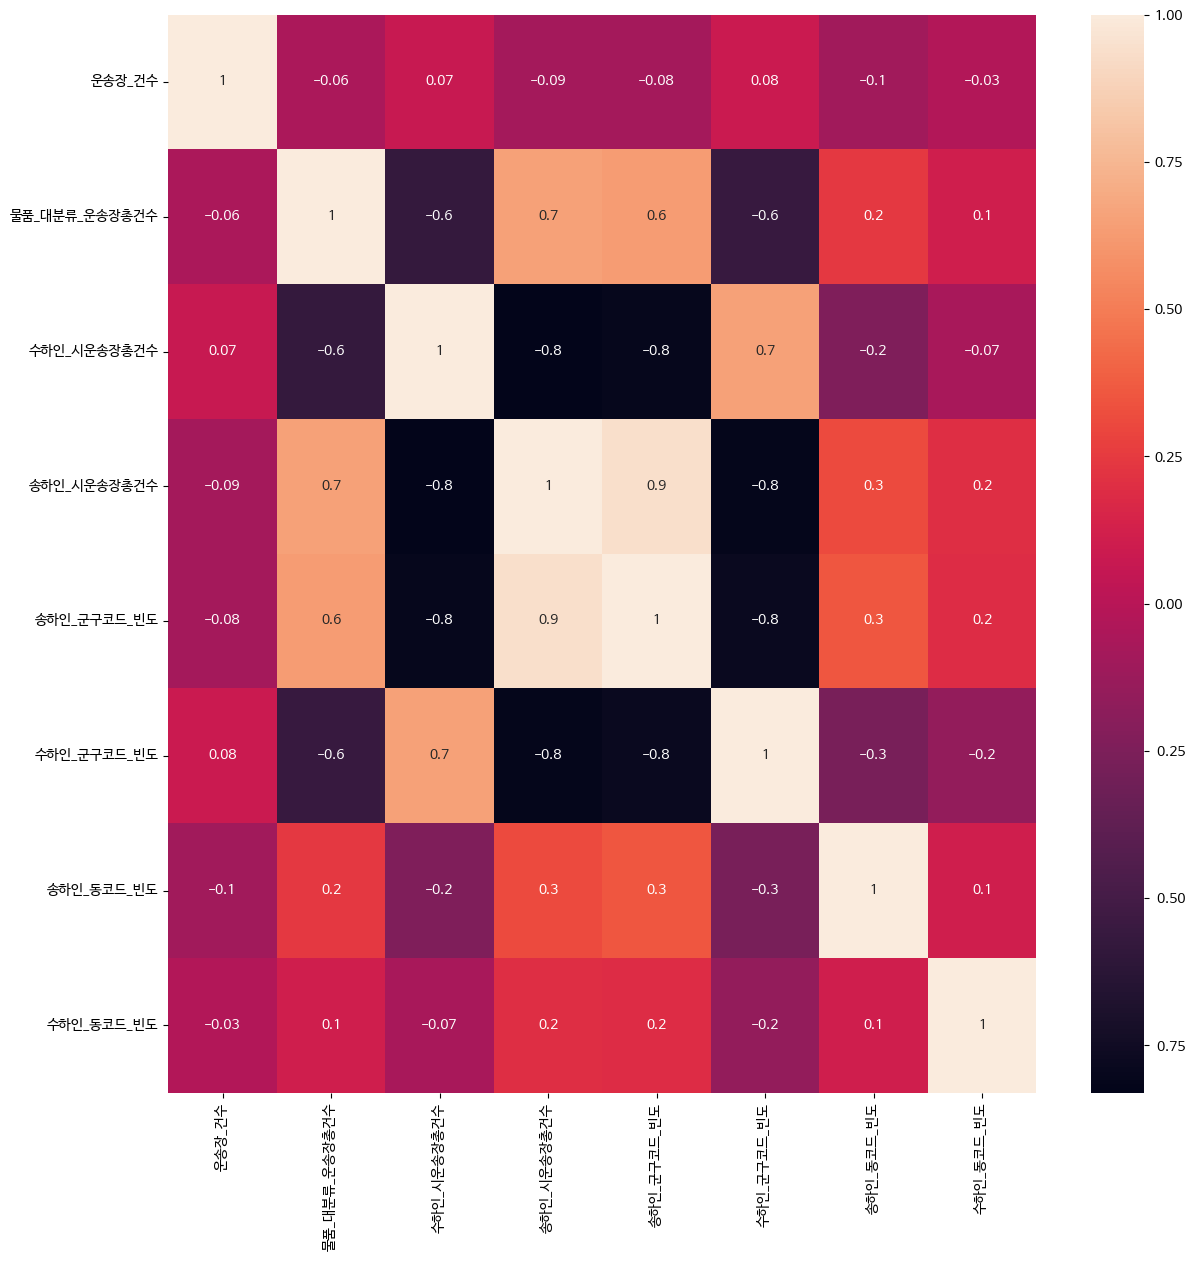

In [ ]:
corr = train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

**성능개선 try 1 : 동코드 drop**

In [ ]:
train = pd.read_csv('train_code.csv')
test = pd.read_csv('test_code.csv')

train_dr = train.drop(['송하인_동코드_빈도', '수하인_동코드_빈도'], axis=1, inplace=False)
test_dr = test.drop(['송하인_동코드_빈도', '수하인_동코드_빈도'], axis=1, inplace=False)

X_features_dr = train_dr.drop(['운송장_건수'], axis=1)
y_labels_dr = train_dr['운송장_건수']
X_train_dr, X_tr_test_dr, y_train_dr, y_tr_test_dr = train_test_split(X_features_dr, y_labels_dr, test_size=0.2, random_state=156)

rbs = RobustScaler()
rbs.fit(X_train_dr)

X_train_scaled0_dr = rbs.transform(X_train_dr)
X_tr_test_scaled0_dr = rbs.transform(X_tr_test_dr)
test_scaled0_dr = rbs.transform(test_dr)

X_train_scaled_dr = pd.DataFrame(X_train_scaled0_dr)
X_train_scaled_dr.columns = train_dr.columns[1:]

X_tr_test_scaled_dr = pd.DataFrame(X_tr_test_scaled0_dr)
X_tr_test_scaled_dr.columns = train_dr.columns[1:]

test_scaled_dr = pd.DataFrame(test_scaled0_dr)
test_scaled_dr.columns = test_dr.columns

**성능개선 try 2 : 시코드 drop**

In [ ]:
train = pd.read_csv('train_code.csv')
test = pd.read_csv('test_code.csv')

train_dr2 = train.drop(['수하인_시운송장총건수',	'송하인_시운송장총건수'], axis=1, inplace=False)
test_dr2 = test.drop(['수하인_시운송장총건수',	'송하인_시운송장총건수'], axis=1, inplace=False)

X_features_dr2 = train_dr2.drop(['운송장_건수'], axis=1)
y_labels_dr2 = train_dr2['운송장_건수']
X_train_dr2, X_tr_test_dr2, y_train_dr2, y_tr_test_dr2 = train_test_split(X_features_dr2, y_labels_dr2, test_size=0.2, random_state=156)

rbs = RobustScaler()
rbs.fit(X_train_dr2)

X_train_scaled0_dr2 = rbs.transform(X_train_dr2)
X_tr_test_scaled0_dr2 = rbs.transform(X_tr_test_dr2)
test_scaled0_dr2 = rbs.transform(test_dr2)

X_train_scaled_dr2 = pd.DataFrame(X_train_scaled0_dr2)
X_train_scaled_dr2.columns = train_dr2.columns[1:]

X_tr_test_scaled_dr2 = pd.DataFrame(X_tr_test_scaled0_dr2)
X_tr_test_scaled_dr2.columns = train_dr2.columns[1:]

test_scaled_dr2 = pd.DataFrame(test_scaled0_dr2)
test_scaled_dr2.columns = test_dr2.columns

In [ ]:
train_dr2.head()

,운송장_건수,물품_대분류_운송장총건수,송하인_군구코드_빈도,수하인_군구코드_빈도,송하인_동코드_빈도,수하인_동코드_빈도
0,3.0,7786,16407,1019,589,31
1,3.0,7786,1494,9136,881,332
2,3.0,119921,16407,1437,4882,550
3,7.0,119921,54,9136,66,20
4,3.0,119921,16407,241,4882,604


# 04 모델링

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
# 랜덤서치 파라미터 튜닝

from sklearn.model_selection import RandomizedSearchCV

#### 1) Random Forest

1. 기본모델 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#모델 정의
model_rf = RandomForestRegressor()

# 모델 학습
model_rf.fit(X_train_scaled, y_train)

# test 데이터 예측
y_pred_rf = model_rf.predict(X_tr_test_scaled)

# RMSE 확인
MSE_rf = mean_squared_error(y_tr_test, y_pred_rf) 
np.sqrt(MSE_rf)

6.6782196963437395

2. 랜덤서치 

In [ ]:
# 랜덤서치 파라미터 튜닝

from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth': range(2, 21, 2),
              'min_samples_split': range(5, 21, 5),
              'min_samples_leaf' : range(5, 21, 5),
              'n_estimators': range(50, 251, 50),
              'random_state': range(100, 2000, 200)
}

model_rf_rd_rs = RandomizedSearchCV(model_rf, param_distributions=params, 
                                    n_iter=50, cv=4, n_jobs=-1)

model_rf_rd_rs.fit(X_train_scaled, y_train)
y_pred_rf_rd_rs = model_rf_rd_rs.best_estimator_.predict(X_tr_test_scaled)

MSE_rf_rd_rs = mean_squared_error(y_tr_test, y_pred_rf_rd_rs) 
np.sqrt(MSE_rf_rd_rs)

6.435131958017037

In [ ]:
model_rf_rd_rs.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50, random_state=1300)

In [ ]:
rf_best = RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50, random_state=1300)
rf_best.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50, random_state=1300)

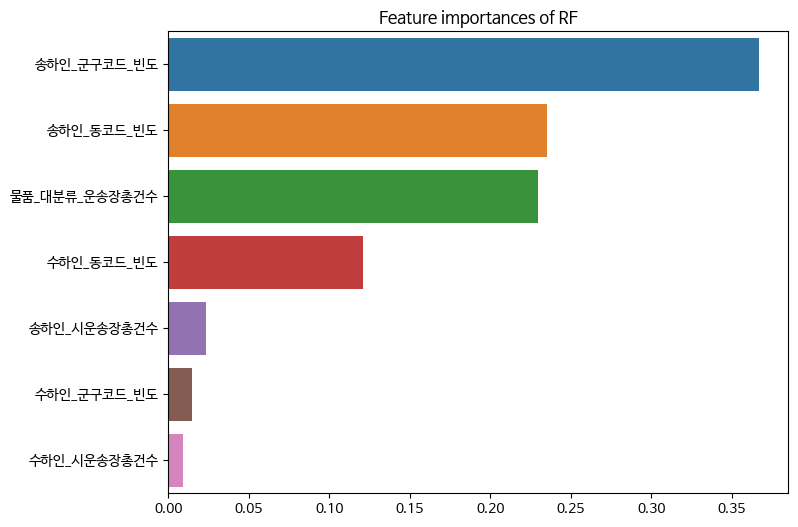

In [ ]:
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances of RF')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**3. 성능개선 try1 : 동코드 drop**

In [ ]:
params = {'max_depth': range(2, 21, 2),
              'min_samples_split': range(5, 21, 5),
              'min_samples_leaf' : range(5, 21, 5),
              'n_estimators': range(50, 251, 50),
              'random_state': range(100, 2000, 200)
}

model_rf_rd_rs_dr = RandomizedSearchCV(model_rf, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_rf_rd_rs_dr.fit(X_train_scaled_dr, y_train_dr)
y_pred_rf_rd_rs_dr = model_rf_rd_rs_dr.best_estimator_.predict(X_tr_test_scaled_dr)

MSE_rf_rd_rs_dr = mean_squared_error(y_tr_test_dr, y_pred_rf_rd_rs_dr) 
np.sqrt(MSE_rf_rd_rs_dr)

6.659800597861587

In [ ]:
model_rf_rd_rs_dr.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=250, random_state=700)

In [ ]:
rf_best_dr = RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=250, random_state=700)
rf_best_dr.fit(X_train_scaled_dr, y_train_dr)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=250, random_state=700)

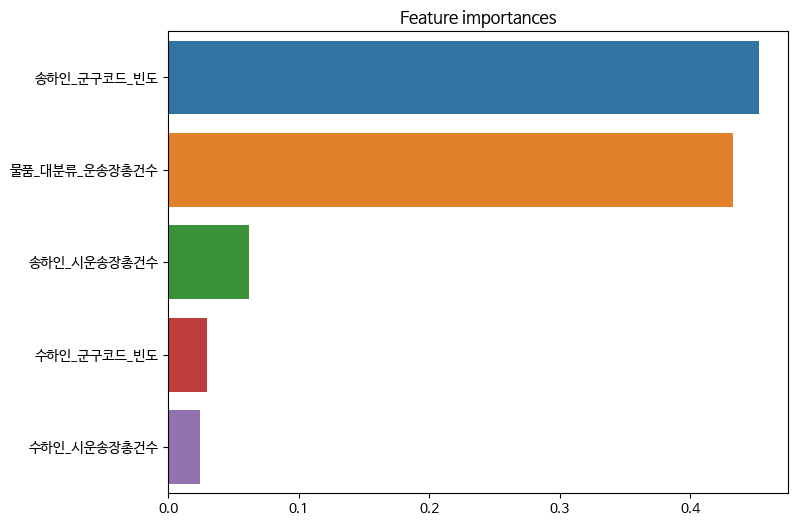

In [ ]:
ftr_importances_values = rf_best_dr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**4. 성능개선 try2 : 시코드 drop**

In [ ]:
params = {'max_depth': range(2, 21, 2),
              'min_samples_split': range(5, 21, 5),
              'min_samples_leaf' : range(5, 21, 5),
              'n_estimators': range(50, 251, 50),
              'random_state': range(100, 2000, 200)
}

model_rf_rd_rs_dr2 = RandomizedSearchCV(model_rf, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_rf_rd_rs_dr2.fit(X_train_scaled_dr2, y_train_dr2)
y_pred_rf_rd_rs_dr2 = model_rf_rd_rs_dr2.best_estimator_.predict(X_tr_test_scaled_dr2)

MSE_rf_rd_rs_dr2 = mean_squared_error(y_tr_test_dr2, y_pred_rf_rd_rs_dr2) 
np.sqrt(MSE_rf_rd_rs_dr2)

6.432784348982589

In [ ]:
model_rf_rd_rs_dr2.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50, random_state=1300)

In [ ]:
rf_best_dr2 = RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50, random_state=1300)
rf_best_dr2.fit(X_train_scaled_dr2, y_train_dr2)

RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50, random_state=1300)

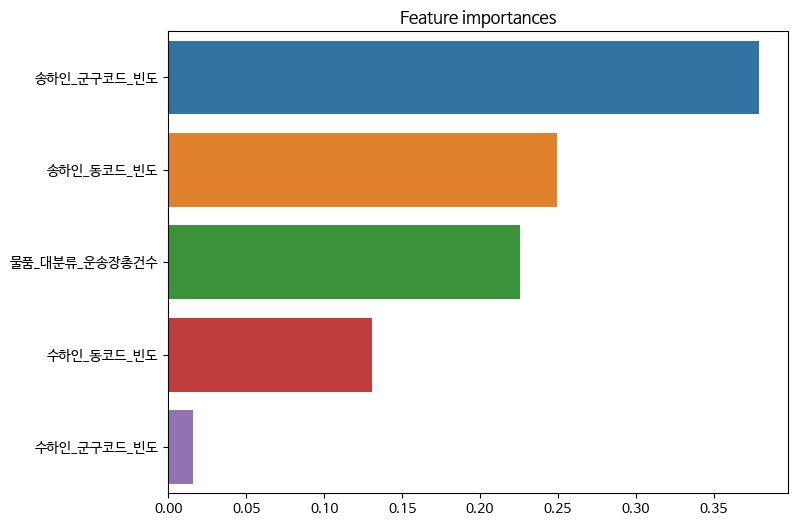

In [ ]:
ftr_importances_values = rf_best_dr2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr2.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### 2) GBM

1. 기본모델

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#모델 정의
model_gbm = GradientBoostingRegressor()

# 모델 학습
model_gbm.fit(X_train_scaled, y_train)

# test 데이터 예측
y_pred_gbm = model_gbm.predict(X_tr_test_scaled)

# RMSE 확인
MSE_gbm = mean_squared_error(y_tr_test, y_pred_gbm) 
np.sqrt(MSE_gbm)

6.408173807127041

2. 랜덤서치 

In [ ]:
from random import * 
from numpy import random

In [ ]:
# 파라미터 튜닝
params = {'max_depth': range(2, 21, 2),
          'min_samples_leaf' :range(5,21,5),
          'min_samples_split': range(5,21,5),
          'n_estimators': range(50, 251, 50), 
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)         
}

model_gbm_rd = RandomizedSearchCV(model_gbm, param_distributions=params, 
                                  n_iter=50, cv=4, n_jobs=-1)

model_gbm_rd.fit(X_train_scaled, y_train)
y_pred_gbm_rd = model_gbm_rd.best_estimator_.predict(X_tr_test_scaled)

MSE_gbm_rd = mean_squared_error(y_tr_test, y_pred_gbm_rd) 
np.sqrt(MSE_gbm_rd)

6.371161805843998

In [ ]:
model_gbm_rd.best_estimator_

GradientBoostingRegressor(learning_rate=0.06685027987618178, max_depth=4,
                          min_samples_leaf=5, min_samples_split=15,
                          random_state=500)

In [ ]:
gbm_best = GradientBoostingRegressor(learning_rate=0.06685027987618178, max_depth=4,
                          min_samples_leaf=5, min_samples_split=15,
                          random_state=500)
gbm_best.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.06685027987618178, max_depth=4,
                          min_samples_leaf=5, min_samples_split=15,
                          random_state=500)

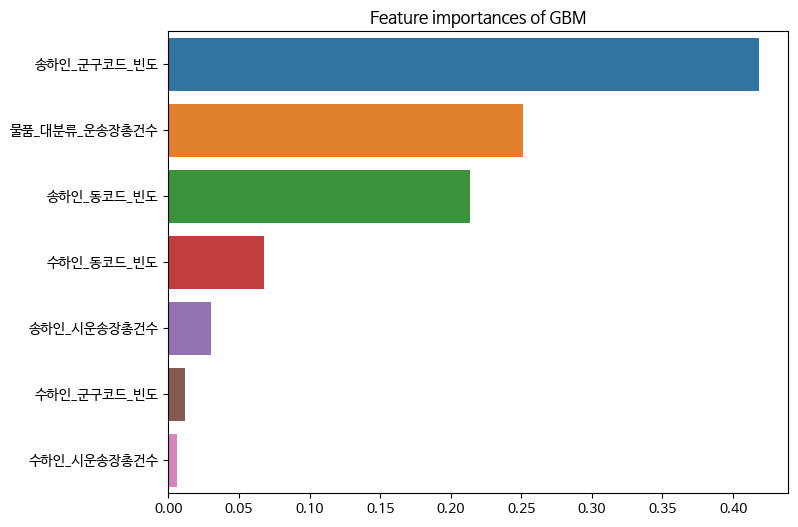

In [ ]:
ftr_importances_values = gbm_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances of GBM')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**3. 성능개선 try1 : 동코드 drop**

In [ ]:
# 파라미터 튜닝
params = {'max_depth': range(2, 21, 2),
          'min_samples_leaf' :range(5,21,5),
          'min_samples_split': range(5,21,5),
          'n_estimators': range(50, 251, 50), 
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)         
}

model_gbm_rd_dr = RandomizedSearchCV(model_gbm, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_gbm_rd_dr.fit(X_train_scaled_dr, y_train_dr)
y_pred_gbm_rd_dr = model_gbm_rd_dr.best_estimator_.predict(X_tr_test_scaled_dr)

MSE_gbm_rd_dr = mean_squared_error(y_tr_test_dr, y_pred_gbm_rd_dr) 
np.sqrt(MSE_gbm_rd_dr)

6.721343884474318

In [ ]:
model_gbm_rd_dr.best_estimator_

GradientBoostingRegressor(learning_rate=0.06323899004932723, max_depth=6,
                          min_samples_leaf=5, min_samples_split=5,
                          random_state=700)

In [ ]:
gbm_best_dr = GradientBoostingRegressor(learning_rate=0.06323899004932723, max_depth=6,
                          min_samples_leaf=5, min_samples_split=5,
                          random_state=700)
gbm_best_dr.fit(X_train_scaled_dr, y_train_dr)

GradientBoostingRegressor(learning_rate=0.06323899004932723, max_depth=6,
                          min_samples_leaf=5, min_samples_split=5,
                          random_state=700)

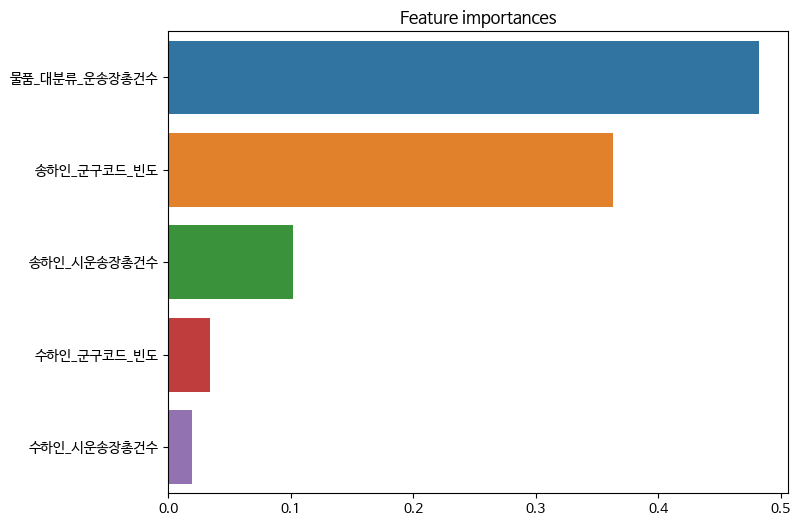

In [ ]:
ftr_importances_values = gbm_best_dr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**4. 성능개선 try2 : 시코드 drop**

In [ ]:
# 파라미터 튜닝
params = {'max_depth': range(2, 21, 2),
          'min_samples_leaf' :range(5,21,5),
          'min_samples_split': range(5,21,5),
          'n_estimators': range(50, 251, 50), 
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)         
}

model_gbm_rd_dr2 = RandomizedSearchCV(model_gbm, param_distributions=params, 
                                      n_iter=50, cv=4, n_jobs=-1)

model_gbm_rd_dr2.fit(X_train_scaled_dr2, y_train_dr2)
y_pred_gbm_rd_dr2 = model_gbm_rd_dr2.best_estimator_.predict(X_tr_test_scaled_dr2)

MSE_gbm_rd_dr2 = mean_squared_error(y_tr_test_dr2, y_pred_gbm_rd_dr2) 
np.sqrt(MSE_gbm_rd_dr2)

6.355810219236102

In [ ]:
model_gbm_rd_dr2.best_estimator_

GradientBoostingRegressor(learning_rate=0.020102741402104937, max_depth=10,
                          min_samples_leaf=5, min_samples_split=20,
                          n_estimators=150, random_state=100)

In [ ]:
gbm_best_dr2 = GradientBoostingRegressor(learning_rate=0.020102741402104937, max_depth=10,
                          min_samples_leaf=5, min_samples_split=20,
                          n_estimators=150, random_state=100)
gbm_best_dr2.fit(X_train_scaled_dr2, y_train_dr2)

GradientBoostingRegressor(learning_rate=0.020102741402104937, max_depth=10,
                          min_samples_leaf=5, min_samples_split=20,
                          n_estimators=150, random_state=100)

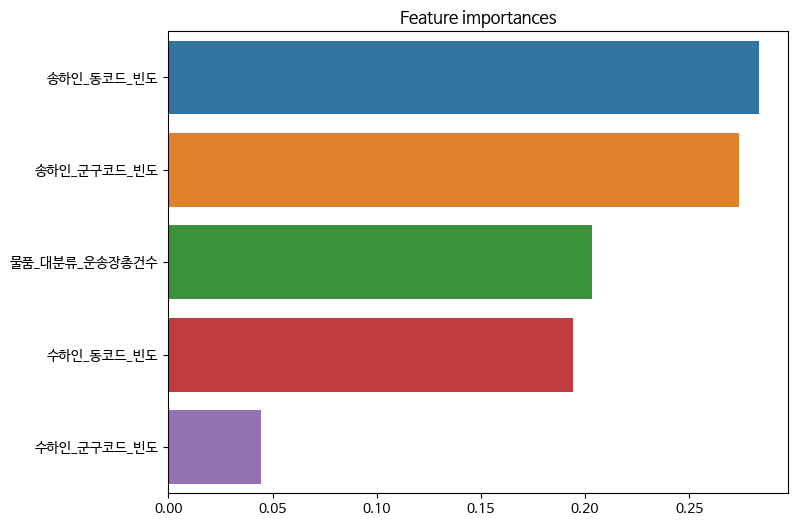

In [ ]:
ftr_importances_values = gbm_best_dr2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr2.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**5. 성능개선 try3 : 파라미터 범위 좁게**

In [ ]:
# GradientBoostingRegressor(learning_rate=0.020102741402104937, max_depth=10,
#                           min_samples_leaf=5, min_samples_split=20,
#                           n_estimators=150, random_state=100)

params = {'max_depth': range(8, 12, 4),
          'min_samples_leaf' :range(3,7,4),
          'min_samples_split': range(18,22,4),
          'n_estimators': range(130,170, 10), 
          'learning_rate': random.uniform(0.019, 0.021, 4),
          'random_state': range(80, 120, 10)         
}

model_gbm_rd_dr2_re = RandomizedSearchCV(model_gbm, param_distributions=params, 
                                         n_iter=50, cv=4, n_jobs=-1)

model_gbm_rd_dr2_re.fit(X_train_scaled_dr2, y_train_dr2)
y_pred_gbm_rd_dr2_re = model_gbm_rd_dr2_re.best_estimator_.predict(X_tr_test_scaled_dr2)

MSE_gbm_rd_dr2_re = mean_squared_error(y_tr_test_dr2, y_pred_gbm_rd_dr2_re) 
np.sqrt(MSE_gbm_rd_dr2_re)

6.341007997131489

In [ ]:
model_gbm_rd_dr2_re.best_estimator_

GradientBoostingRegressor(learning_rate=0.020793881418083547, max_depth=8,
                          min_samples_leaf=3, min_samples_split=18,
                          n_estimators=130, random_state=110)

In [ ]:
gbm_best_dr2_re = GradientBoostingRegressor(learning_rate=0.02, max_depth=8,
                          min_samples_leaf=3, min_samples_split=18,
                          n_estimators=130, random_state=110)
gbm_best_dr2_re.fit(X_train_scaled_dr2, y_train_dr2)

GradientBoostingRegressor(learning_rate=0.02, max_depth=8, min_samples_leaf=3,
                          min_samples_split=18, n_estimators=130,
                          random_state=110)

#### 3) LGBM

1. 기본모델 

In [ ]:
from lightgbm import LGBMRegressor

#모델 정의
model_lgbm = LGBMRegressor()

# 모델 학습
model_lgbm.fit(X_train_scaled, y_train)

# test 데이터 예측
y_pred_lgbm = model_lgbm.predict(X_tr_test_scaled)

In [ ]:
# RMSE 확인
MSE_lgbm = mean_squared_error(y_tr_test, y_pred_lgbm) 
np.sqrt(MSE_lgbm)

6.4104618094844215

2. 랜덤서치  

In [ ]:
# 파라미터 튜닝
params = {'max_depth': range(2, 21, 2),
          'num_leaves': range(100, 201, 20),
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)          
}

model_lgbm_rd = RandomizedSearchCV(model_lgbm, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_lgbm_rd.fit(X_train_scaled, y_train)
y_pred_lgbm_rd = model_lgbm_rd.best_estimator_.predict(X_tr_test_scaled)

MSE_lgbm_rd = mean_squared_error(y_tr_test, y_pred_lgbm_rd) 
np.sqrt(MSE_lgbm_rd)

6.388405236710939

In [ ]:
model_lgbm_rd.best_estimator_

LGBMRegressor(learning_rate=0.07393570013401811, max_depth=6, num_leaves=180,
              random_state=1100)

In [ ]:
lgbm_best = LGBMRegressor(learning_rate=0.07393570013401811, max_depth=6, num_leaves=180,
              random_state=1100)
lgbm_best.fit(X_train_scaled, y_train)

LGBMRegressor(learning_rate=0.07393570013401811, max_depth=6, num_leaves=180,
              random_state=1100)

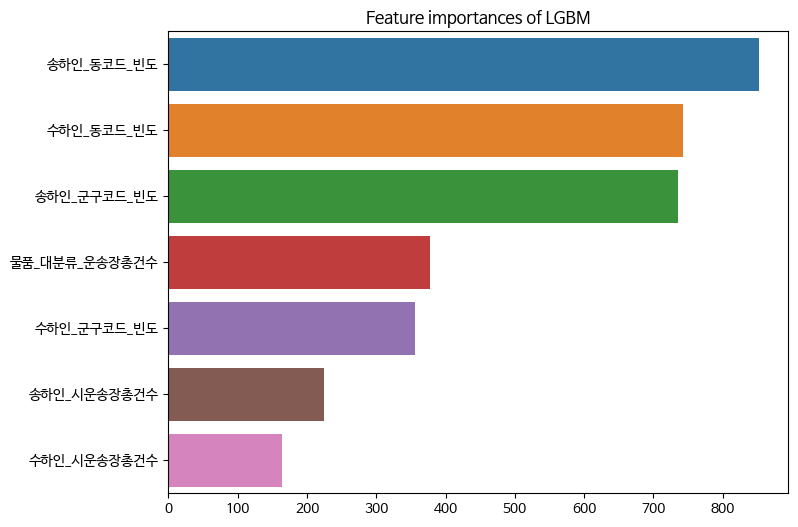

In [ ]:
ftr_importances_values = lgbm_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances of LGBM')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**3. 성능개선 try1 : 동코드 drop**

In [ ]:
params = {'max_depth': range(2, 21, 2),
          'num_leaves': range(100, 201, 20),
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)          
}

model_lgbm_rd_dr = RandomizedSearchCV(model_lgbm, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_lgbm_rd_dr.fit(X_train_scaled_dr, y_train_dr)
y_pred_lgbm_rd_dr = model_lgbm_rd_dr.best_estimator_.predict(X_tr_test_scaled_dr)

MSE_lgbm_rd_dr = mean_squared_error(y_tr_test_dr, y_pred_lgbm_rd_dr) 
np.sqrt(MSE_lgbm_rd_dr)

6.6562967400319835

In [ ]:
model_lgbm_rd_dr.best_estimator_

LGBMRegressor(learning_rate=0.09684489598781318, max_depth=10, num_leaves=120,
              random_state=1300)

In [ ]:
lgbm_best_dr = LGBMRegressor(learning_rate=0.09684489598781318, max_depth=10, num_leaves=120,
              random_state=1300)
lgbm_best_dr.fit(X_train_scaled_dr, y_train_dr)

LGBMRegressor(learning_rate=0.09684489598781318, max_depth=10, num_leaves=120,
              random_state=1300)

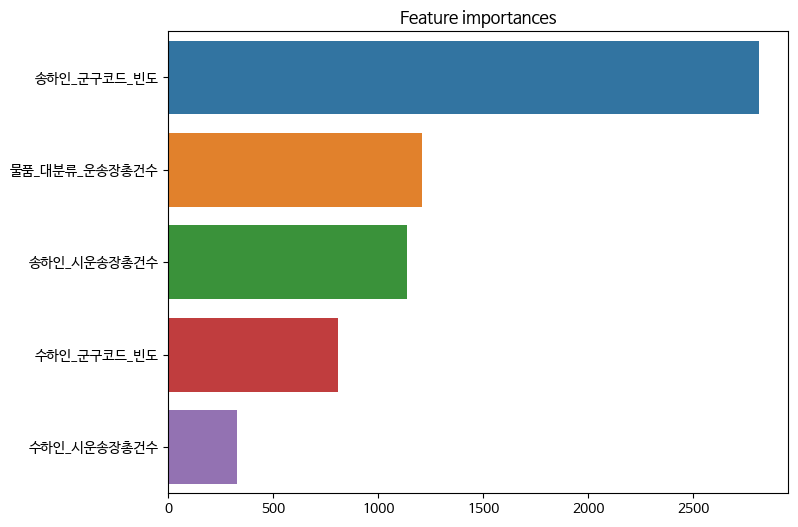

In [ ]:
ftr_importances_values = lgbm_best_dr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**4. 성능개선 try2 : 시코드 drop**

In [ ]:
params = {'max_depth': range(2, 21, 2),
          'num_leaves': range(100, 201, 20),
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)          
}

model_lgbm_rd_dr2 = RandomizedSearchCV(model_lgbm, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_lgbm_rd_dr2.fit(X_train_scaled_dr2, y_train_dr2)
y_pred_lgbm_rd_dr2 = model_lgbm_rd_dr2.best_estimator_.predict(X_tr_test_scaled_dr2)

MSE_lgbm_rd_dr2 = mean_squared_error(y_tr_test_dr2, y_pred_lgbm_rd_dr2) 
np.sqrt(MSE_lgbm_rd_dr2)

6.426987916583144

In [ ]:
model_lgbm_rd_dr2.best_estimator_

LGBMRegressor(learning_rate=0.052124971943112636, max_depth=6, num_leaves=200,
              random_state=1100)

In [ ]:
lgbm_best_dr2 = LGBMRegressor(learning_rate=0.052124971943112636, max_depth=6, num_leaves=200,
              random_state=1100)
lgbm_best_dr2.fit(X_train_scaled_dr, y_train_dr)

LGBMRegressor(learning_rate=0.052124971943112636, max_depth=6, num_leaves=200,
              random_state=1100)

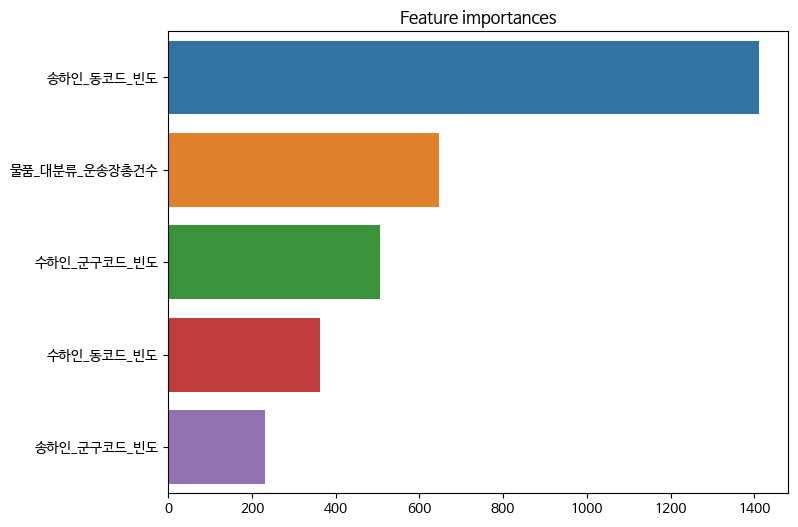

In [ ]:
ftr_importances_values = lgbm_best_dr2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr2.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### 4) XGBoost

1. 기본모델 

In [ ]:
from xgboost import XGBRegressor

#모델 정의
model_xgb = XGBRegressor()

# 모델 학습
model_xgb.fit(X_train_scaled, y_train)

# test 데이터 예측
y_pred_xgb = model_xgb.predict(X_tr_test_scaled)

In [ ]:
# RMSE 확인
MSE_xgb = mean_squared_error(y_tr_test, y_pred_xgb) 
np.sqrt(MSE_xgb)

6.466819792344258

2. 랜덤서치  

In [ ]:
# 파라미터 튜닝
params = {'max_depth': range(2, 21, 2),
          'subsample': random.uniform(0.4, 1, 5),
          'n_estimators': range(50, 251, 50), 
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)          
}

model_xgb_rd = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_xgb_rd.fit(X_train_scaled, y_train)
y_pred_xgb_rd = model_xgb_rd.best_estimator_.predict(X_tr_test_scaled)

MSE_xgb_rd = mean_squared_error(y_tr_test, y_pred_xgb_rd) 
np.sqrt(MSE_xgb_rd)

6.358337366841435

In [ ]:
model_xgb_rd.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06331882777117818,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=900, ...)

In [ ]:
model_xgb_rd.best_estimator_.subsample

0.9683622992333285

In [ ]:
xgb_best = XGBRegressor(learning_rate=0.0633188, max_depth=4, subsample=0.96836,
                        n_estimators=100, random_state=900)
xgb_best.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0633188,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=900, ...)

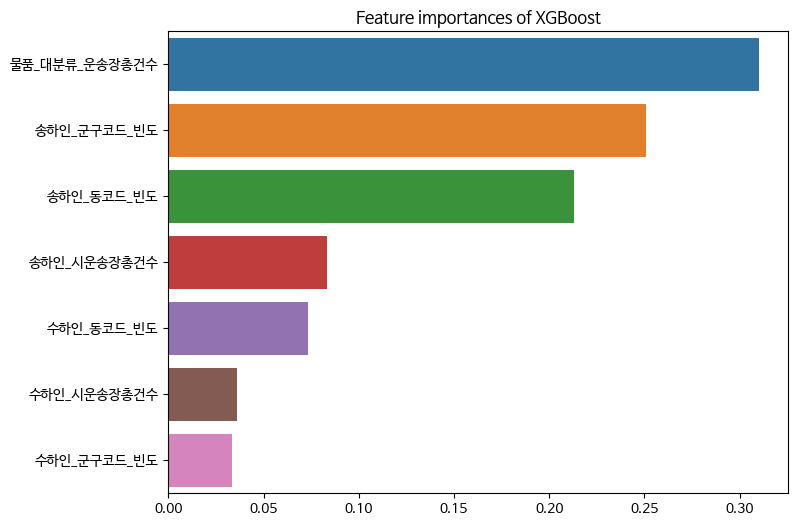

In [ ]:
ftr_importances_values = xgb_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances of XGBoost')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**3. 성능개선 try1 : 동코드 drop**

In [ ]:
params = {'max_depth': range(2, 21, 2),
          'subsample': random.uniform(0.4, 1, 5),
          'n_estimators': range(50, 251, 50), 
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)          
}

model_xgb_rd_dr = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_xgb_rd_dr.fit(X_train_scaled_dr, y_train_dr)
y_pred_xgb_rd_dr = model_xgb_rd_dr.best_estimator_.predict(X_tr_test_scaled_dr)

MSE_xgb_rd_dr = mean_squared_error(y_tr_test_dr, y_pred_xgb_rd_dr) 
np.sqrt(MSE_xgb_rd_dr)

6.678917975665224

In [ ]:
model_xgb_rd_dr.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04407398637501159,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1700, ...)

In [ ]:
model_xgb_rd_dr.best_estimator_.subsample

In [ ]:
xgb_best_dr =XGBRegressor(learning_rate=0.044073986, max_depth=6,
                          n_estimators=100, subsample=
                          random_state=1700)
xgb_best_dr.fit(X_train_scaled_dr, y_train_dr)

In [ ]:
ftr_importances_values = xgb_best_dr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

**4. 성능개선 try2 : 시코드 drop**

In [ ]:
params = {'max_depth': range(2, 21, 2),
          'subsample': random.uniform(0.4, 1, 5),
          'n_estimators': range(50, 251, 50), 
          'learning_rate': random.uniform(0.02, 0.1, 5),
          'random_state': range(100, 2001, 200)          
}

model_xgb_rd_dr2 = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=50, cv=4, n_jobs=-1)

model_xgb_rd_dr2.fit(X_train_scaled_dr2, y_train_dr2)
y_pred_xgb_rd_dr2 = model_xgb_rd_dr2.best_estimator_.predict(X_tr_test_scaled_dr2)

MSE_xgb_rd_dr2 = mean_squared_error(y_tr_test_dr2, y_pred_xgb_rd_dr2) 
np.sqrt(MSE_xgb_rd_dr2)

6.515762955271127

In [ ]:
model_xgb_rd_dr2.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0980484529482544,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1300, ...)

In [ ]:
model_xgb_rd_dr2.best_estimator_.subsample

0.7170835967440049

In [ ]:
xgb_best_dr2 =XGBRegressor(learning_rate=0.098, max_depth=4,
                           n_estimators=100, subsample=0.71708,
                           random_state=1300)
xgb_best_dr2.fit(X_train_scaled_dr2, y_train_dr2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.098, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1300, ...)

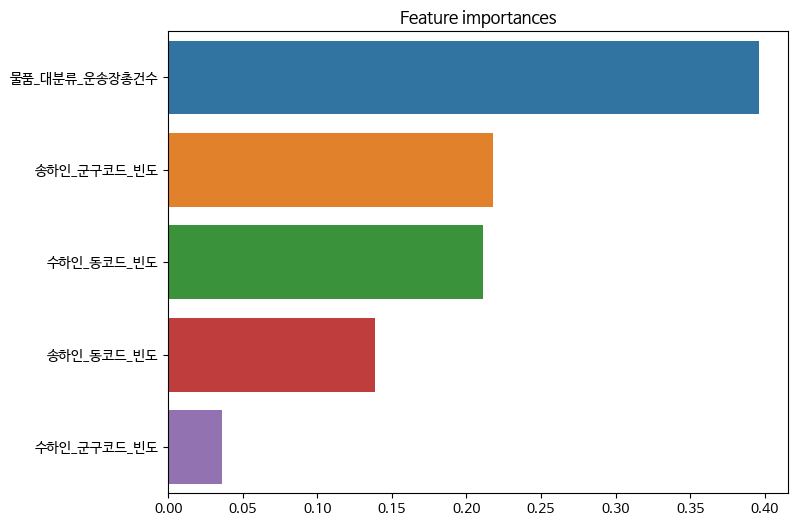

In [ ]:
ftr_importances_values = xgb_best_dr2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_scaled_dr2.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 5) 앙상블

**소프트맥스**

2. 랜덤서치 

In [ ]:
y_pred_soft = 0.4*y_pred_gbm_rd + 0.3*y_pred_xgb_rd + 0.2*y_pred_lgbm_rd + 0.1*y_pred_rf_rd_rs

MSE_soft = mean_squared_error(y_tr_test, y_pred_soft) 
np.sqrt(MSE_soft)

**3. 성능개선 try1 : 동코드 drop**

In [ ]:
y_pred_rf_rd_rs_dr = rf_best_dr.predict(test_scaled_dr)
y_pred_gbm_rd_dr = gbm_best_dr.predict(test_scaled_dr)
y_pred_lgbm_rd_dr = lgbm_best_dr.predict(test_scaled_dr)
y_pred_xgb_rd_dr = xgb_best_dr.predict(test_scaled_dr)

y_pred_soft_dr = 0.1*y_pred_gbm_rd_dr + 0.2*y_pred_xgb_rd_dr + 0.2*y_pred_lgbm_rd_dr + 0.5*y_pred_rf_rd_rs_dr

**4. 성능개선 try2 : 시코드 drop**

In [ ]:
y_pred_rf_rd_dr2 = rf_best_dr2.predict(test_scaled_dr2)
y_pred_gbm_rd_dr2 = gbm_best_dr2.predict(test_scaled_dr2)
y_pred_lgbm_rd_dr2 = lgbm_best_dr2.predict(test_scaled_dr2)
y_pred_xgb_rd_dr2 = xgb_best_dr2.predict(test_scaled_dr2)

y_pred_soft_dr2_4 = 0.9*y_pred_gbm_rd_dr2 + 0*y_pred_xgb_rd_dr2 + 0*y_pred_lgbm_rd_dr2 + 0.1*y_pred_rf_rd_dr2

In [ ]:
y_pred_gbm_rd_dr2_re = gbm_best_dr2_re.predict(test_scaled_dr2)

# 정답파일 생성

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,index,운송장_건수
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
submission['운송장_건수'] = y_pred_soft
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트/sub_soft3.csv',index = False, encoding="utf-8-sig")

In [ ]:
y_pred_rf_rd = model_rf_rd.best_estimator_.predict(test)
submission['운송장_건수'] = y_pred_rf_rd
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트/sub_rf_rd.csv',index = False, encoding="utf-8-sig")

In [ ]:
# 29일날 제출해보기
y_pred_rf_rd_rs = model_rf_rd_rs.best_estimator_.predict(test)
submission['운송장_건수'] = y_pred_rf_rd_rs
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트/sub_rf_rd_rs.csv',index = False, encoding="utf-8-sig")

In [ ]:
y_pred_gbm_rd_sc = model_gbm_rd.best_estimator_.predict(test_scaled)
submission['운송장_건수'] = y_pred_gbm_rd_sc
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트/sub_gbm_rd_sc.csv',index = False, encoding="utf-8-sig")

In [ ]:
y_pred_lgbm_rd_sc = model_lgbm_rd.best_estimator_.predict(test_scaled)
submission['운송장_건수'] = y_pred_lgbm_rd_sc
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트/sub_lgbm_rd_sc.csv',index = False, encoding="utf-8-sig")

In [ ]:
y_pred_xgb_rd_sc = model_xgb_rd.best_estimator_.predict(test_scaled)
submission['운송장_건수'] = y_pred_xgb_rd_sc
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트/sub_xgb_rd_sc.csv',index = False, encoding="utf-8-sig")

**성능개선 try : 동코드 drop**

In [ ]:
submission['운송장_건수'] = y_pred_soft_dr*0.3 + y_pred_gbm_rd_dr2*0.7
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트1/(soft_dr1)+(gbm_dr2).csv',index = False, encoding="utf-8-sig")

In [ ]:
submission['운송장_건수'] = y_pred_soft_dr
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트/sub_soft3_dr.csv',index = False, encoding="utf-8-sig")

In [ ]:
submission['운송장_건수'] = y_pred_soft_dr2_4
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트1/sub_soft_dr2_4.csv',index = False, encoding="utf-8-sig")

In [ ]:
submission['운송장_건수'] = y_pred_gbm_rd_dr2
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트1/sub_gbm_dr2.csv',index = False, encoding="utf-8-sig")

In [ ]:
submission['운송장_건수'] = y_pred_xgb_rd_dr2
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트1/sub_xgb_dr2.csv',index = False, encoding="utf-8-sig")

In [ ]:
submission['운송장_건수'] = y_pred_gbm_rd_dr2_re*0.2 + y_pred_gbm_rd_dr2*0.8
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트1/sub_gbm_dr2_re.csv',index = False, encoding="utf-8-sig")

In [ ]:
submission['운송장_건수'] = y_pred_soft_dr*0.1 + y_pred_gbm_rd_dr2_re*0.2 + y_pred_gbm_rd_dr2*0.7
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트1/sub_gbm_dr2_re3.csv',index = False, encoding="utf-8-sig")

In [ ]:
submission['운송장_건수'] = y_pred_gbm_rd_dr2_re*0.3 + y_pred_gbm_rd_dr2*0.7
submission.to_csv('/content/drive/MyDrive/ESAA/OB프로젝트1/sub_gbm_dr2_re4.csv',index = False, encoding="utf-8-sig")
## 최종!! 100등!!!

# 05 시각화

## 1) 지역별


#### 지역별(송하인:제주도)

- 송하인이 제주도인 데이터만 추출 (제주도코드 50130, 50110)

In [ ]:
#제주도 제주시 -> 제주시 
df[df['송하인_시군구코드']=='50110'][df['수하인_시군구코드']=='50110']['운송장_건수'].sum()

In [ ]:
#제주도 제주시가 송하인일때
df[df['송하인_시군구코드']=='50110'].groupby(['수하인_시군구코드'])['운송장_건수'].sum().sort_values()

In [ ]:
#제주도 서귀포시 -> 서귀포시
df[df['송하인_시군구코드']=='50130'][df['수하인_시군구코드']=='50130']['운송장_건수'].sum()

In [ ]:
#제주도 서귀포시가 송하인일때
df[df['송하인_시군구코드']=='50130'].groupby(['수하인_시군구코드'])['운송장_건수'].sum().sort_values()

In [ ]:
#제주도(제주시+서귀포시)가 송하인일때
df[(df['송하인_시군구코드']=='50130')|(df['송하인_시군구코드']=='50110')].groupby(['수하인_시군구코드'])['운송장_건수'].sum().sort_values()

In [ ]:
#제주도(제주시+서귀포시)가 송하인일때 시군구별 운송장건수 합계
df[(df['송하인_시군구코드']=='50130')|(df['송하인_시군구코드']=='50130')].groupby(['수하인_시군구코드'])['운송장_건수'].sum().sort_values()

In [ ]:
#제주도(제주시+서귀포시)가 송하인일때 시군구별 운송장건수 합계
df_FromJeju_Where = df[(df['송하인_시군구코드']=='50130')|(df['송하인_시군구코드']=='50110')].groupby(['수하인_시군구코드'])['운송장_건수'].sum().to_frame().reset_index()
df_FromJeju_Where

In [ ]:
import folium

bins = list(df_FromJeju_Where['운송장_건수'].quantile([0, 0.25, 0.5, 0.75, 1]))
korea_map = folium.Map(location=[35.8, 128.071503], zoom_start=7,) #[위도,경도] 입력 후 확대 비율 설정


korea_DO = '/content/drive/MyDrive/OB1조/프로젝트(1)/Data//SIDO_MAP_2022.json'
distribution_map.choropleth(geo_data=korea_DO, line_color='blue',line_weight=4,fill_color='white',fill_opacity=0.1,Highlight = True, show = False,overlay = True, line_opacity=0.8)

korea_SIGUNGU = '/content/drive/MyDrive/OB1조/프로젝트(1)/Data/TL_SCCO_SIG.json'
distribution_map.choropleth(geo_data=korea_SIGUNGU, line_color='black',line_weight=2.5,fill_color='white',fill_opacity=0.1, line_opacity=0.4)


folium.Choropleth(geo_data=korea_SIGUNGU, data = df_FromJeju_Where, 
                  columns=('수하인_시군구코드', '운송장_건수'),
                  key_on='feature.properties.SIG_CD',
                  fill_color='BuPu',
                  bins = bins,
                legend_name='수하인 운송장 건수').add_to(korea_map)
korea_map

#### 지역별(수하인:제주도)

In [ ]:
#수하인이 제주도일때 
df_ToJeju_Where = df[(df['수하인_시군구코드']=='50130')|(df['수하인_시군구코드']=='50110')].groupby(['송하인_시군구코드'])['운송장_건수'].sum().to_frame().reset_index()
df_ToJeju_Where

In [ ]:
import folium

bins = list(df_ToJeju_Where['운송장_건수'].quantile([0, 0.25, 0.5, 0.75, 1]))
korea_map = folium.Map(location=[35.8, 128.071503], zoom_start=7,) #[위도,경도] 입력 후 확대 비율 설정


korea_DO = '/content/drive/MyDrive/OB1조/프로젝트(1)/Data//SIDO_MAP_2022.json'
distribution_map.choropleth(geo_data=korea_DO, line_color='blue',line_weight=4,fill_color='white',fill_opacity=0.1,Highlight = True, show = False,overlay = True, line_opacity=0.8)

korea_SIGUNGU = '/content/drive/MyDrive/OB1조/프로젝트(1)/Data/TL_SCCO_SIG.json'
distribution_map.choropleth(geo_data=korea_SIGUNGU, line_color='black',line_weight=2.5,fill_color='white',fill_opacity=0.1, line_opacity=0.4)


folium.Choropleth(geo_data=korea_SIGUNGU, data = df_ToJeju_Where, 
                  columns=('송하인_시군구코드', '운송장_건수'),
                  key_on='feature.properties.SIG_CD',
                  fill_color='BuPu',
                  bins=bins,
                  legend_name='송하인 운송장 건수').add_to(korea_map)
korea_map

## 2) 물품별

#### 물품별 (송하인: 제주도)

In [ ]:
df_FromJeju = df[(df['송하인_시군구코드']=='50130')|(df['송하인_시군구코드']=='50110')]
df_FromJeju

In [ ]:
#송하인: 제주도 / 지역 별 어떤 물건을 많이 받나? 
df_FromJeju_What = df_FromJeju.groupby(['물품_카테고리_대분류'])['운송장_건수'].sum().to_frame().reset_index()
df_FromJeju_What

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
labels = df_FromJeju_What['물품_카테고리_대분류'].tolist() ## 라벨
frequency = df_FromJeju_What['운송장_건수'].tolist() ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

In [ ]:
x = df_FromJeju_What['물품_카테고리_대분류'].tolist()
values = df_FromJeju_What['운송장_건수'].tolist()

plt.bar(x, values)

plt.show()

In [ ]:
# 식품 중에서 어떤 걸 많이?
df_FromJeju_Food = df_FromJeju[df_FromJeju['물품_카테고리_대분류'] == '식품'].groupby('물품_카테고리')['운송장_건수'].sum().to_frame().reset_index()
df_FromJeju_Food

In [ ]:
## 데이터 준비
labels = df_FromJeju_Food['물품_카테고리'].tolist() ## 라벨
frequency = df_FromJeju_Food['운송장_건수'].tolist() ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

#### 물품별 (수하인: 제주도)

In [ ]:
df_ToJeju = df[(df['수하인_시군구코드']=='50130')|(df['수하인_시군구코드']=='50110')]
df_ToJeju

In [ ]:
#수하인: 제주도 / 지역 별 어떤 물건을 많이 보내나? 
df_ToJeju_What = df_ToJeju.groupby(['물품_카테고리_대분류'])['운송장_건수'].sum().to_frame().reset_index()
df_ToJeju_What

In [ ]:
## 데이터 준비
labels = df_ToJeju_What['물품_카테고리_대분류'].tolist() ## 라벨
frequency = df_ToJeju_What['운송장_건수'].tolist() ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

In [ ]:
x = df_ToJeju_What['물품_카테고리_대분류'].tolist()
values = df_ToJeju_What['운송장_건수'].tolist()

plt.bar(x, values)

plt.show()

In [ ]:
# 식품 중에서 어떤 걸 많이?
df_ToJeju_Food = df_ToJeju[df_ToJeju['물품_카테고리_대분류'] == '식품'].groupby('물품_카테고리')['운송장_건수'].sum().to_frame().reset_index()
df_ToJeju_Food

In [ ]:
import numpy as np
 
## 데이터 준비
labels = df_ToJeju_Food['물품_카테고리'].tolist() ## 라벨
frequency = df_ToJeju_Food['운송장_건수'].tolist() ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()